In [112]:
import pandas as pd

df = pd.read_excel ('orders_09152022_1505.xlsx')
print (df)

      Unnamed: 0 Data utworzenia  Dodatkowe informacje Status zamówienia  \
0            NaN      2022-08-31                   NaN      Zrealizowano   
1            NaN      2022-08-31                   NaN      Zrealizowano   
2            NaN      2022-08-31                   NaN      Zrealizowano   
3            NaN      2022-08-31                   NaN      Zrealizowano   
4            NaN      2022-08-31                   NaN      Zrealizowano   
...          ...             ...                   ...               ...   
7908         NaN      2022-06-01                   NaN      Zrealizowano   
7909         NaN      2022-06-01                   NaN      Zrealizowano   
7910         NaN      2022-06-01                   NaN      Zrealizowano   
7911         NaN      2022-06-01                   NaN      Zrealizowano   
7912         NaN      2022-06-01                   NaN      Zrealizowano   

     Status rozliczenia                        Nazwa oferty  Ilość  \
0        Do rozli

In [113]:
df_topTen = df.nlargest(10, ['Ilość'])['Nazwa oferty']

In [114]:
df_topTen


2673                        e-Karta Podarunkowa Sport 100
2674                                       Biedronka  100
1083    Bilety do Kina 2D POLSKA BEZ WARSZAWY i PRUSZKOWA
1653                             Bilety do Kina 2D POLSKA
2790                                          Saruman  50
3615                         e-Karta Podarunkowa Sport 50
4786                             Bilety do Kina 2D POLSKA
5688                       Helios - cała Polska seanse 2D
7650                                       Kino 2D Polska
7478                                       Kino 2D Polska
Name: Nazwa oferty, dtype: object

In [115]:
# Poniżej skrypt do sumowania wartości zamówień typu 'eKarta prezentowa Książkowo' w odniesieniu do konkretnego dnia


from re import search

daty = df['Data utworzenia'].unique()
sumy = []

for data in daty:
    suma = 0
    for ind in df.index:
        if search('eKarta prezentowa Książkowo', df['Nazwa oferty'][ind]) and df['Data utworzenia'][ind] == pd.Timestamp(data):
            suma = suma + (df['Ilość'][ind]*df['Cena za szt.'][ind])
    sumy.append(suma)
    
            
        
        
        
        
print(daty)
print(sumy)
        

['2022-08-31T00:00:00.000000000' '2022-08-30T00:00:00.000000000'
 '2022-08-29T00:00:00.000000000' '2022-08-28T00:00:00.000000000'
 '2022-08-27T00:00:00.000000000' '2022-08-26T00:00:00.000000000'
 '2022-08-25T00:00:00.000000000' '2022-08-24T00:00:00.000000000'
 '2022-08-23T00:00:00.000000000' '2022-08-22T00:00:00.000000000'
 '2022-08-21T00:00:00.000000000' '2022-08-20T00:00:00.000000000'
 '2022-08-19T00:00:00.000000000' '2022-08-18T00:00:00.000000000'
 '2022-08-17T00:00:00.000000000' '2022-08-16T00:00:00.000000000'
 '2022-08-15T00:00:00.000000000' '2022-08-14T00:00:00.000000000'
 '2022-08-13T00:00:00.000000000' '2022-08-12T00:00:00.000000000'
 '2022-08-11T00:00:00.000000000' '2022-08-10T00:00:00.000000000'
 '2022-08-09T00:00:00.000000000' '2022-08-08T00:00:00.000000000'
 '2022-08-07T00:00:00.000000000' '2022-08-06T00:00:00.000000000'
 '2022-08-05T00:00:00.000000000' '2022-08-04T00:00:00.000000000'
 '2022-08-03T00:00:00.000000000' '2022-08-02T00:00:00.000000000'
 '2022-08-01T00:00:00.000

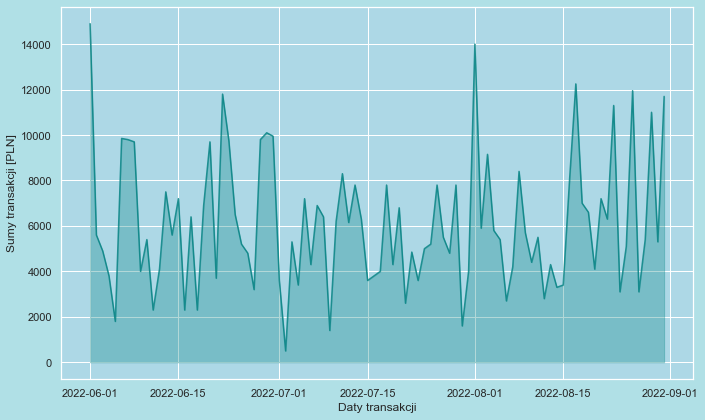

In [116]:
df_plot = pd.DataFrame(list(zip(daty, sumy)),
               columns =['Daty transakcji', 'Sumy transakcji [PLN]'])


import seaborn as sns
import matplotlib.pyplot as plt


sns.color_palette("deep")
sns.set(style="darkgrid")
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'powderblue'})
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.lineplot(data=df_plot,x = 'Daty transakcji', y = 'Sumy transakcji [PLN]',linewidth=1.5, markers= True, color = 'teal', alpha=0.8)
                 
l1 = ax.lines[0]

x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]

ax.fill_between(x1, y1, color="teal", alpha=0.3)


plt.show()

In [118]:
df_topTen.to_excel("topTen.xlsx")

df_plot.to_excel("daneWykres.xlsx")